# Data Upload

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

import torch as torch

import tensorflow_datasets as tfds
import random 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.util import montage

import pandas as pd
import cv2
import keras
import numpy as np


from sklearn.metrics import accuracy_score
from tqdm.autonotebook import tqdm

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

tf.test.gpu_device_name()

Using TensorFlow backend.


'/device:GPU:0'

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def see_data(i):
    print("---Showing img #" + str(i) +"---")
    print("Shape: " + str(training_data[i][0].shape))
    print("Label: " +  str(training_data[i][1] + 1))
    print("Array: " + str(training_data[i][0]))
    plt.imshow(training_data[i][0])
    plt.show()
    print("---Show done---")

def see_data_t(i):
    print("---Showing img #" + str(i) +"---")
    print("Shape: " + str(training_data[i][0].shape))
    print("Array: " + str(training_data[i][0]))
    plt.imshow(training_data[i][0])
    plt.show()
    print("---Show done---")

def print_perc(l):
    c1=0
    c2=0
    c3=0
    c4=0
    c5=0
    total = len(l)
    for label in l:
        if(label == 0):
            c1 += 1
        if(label == 1):
            c2 += 1
        if(label == 2):
            c3 += 1
        if(label == 3):
            c4 += 1
        if(label == 4):
            c5 += 1
    
    print("Percentage of 1: %" + str(format( c1/total*100, '.2f') ) )
    print("Percentage of 2: %" + str(format( c2/total*100, '.2f') ) )
    print("Percentage of 3: %" + str(format( c3/total*100, '.2f') ) )
    print("Percentage of 4: %" + str(format( c4/total*100, '.2f') ) )
    print("Percentage of 5: %" + str(format( c5/total*100, '.2f') ) )


In [0]:
import pickle

IMG_SIZE = 128
training_data = []

training_data = pickle.load(open("/content/drive/My Drive/CS412 PROJECT/Final Notebooks/pickle/Training_data_trimmed.pickle", "rb"))

In [0]:
# for i in range(len(training_data)):
#     training_data[i][0] = cv2.resize(training_data[i][0], (IMG_SIZE,IMG_SIZE))

# Split and Modify Data

In [7]:
print(len(training_data))

10000


---Showing img #31---
Shape: (128, 128, 3)
Label: 1
Array: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


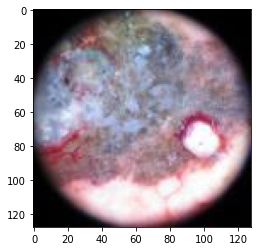

---Show done---


In [8]:
see_data(31)

# Transfer Leaning

In [0]:
import os
from glob import glob

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model
from keras.applications.densenet import DenseNet201
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)   #gray scale 1 --> 3 for RGB
y = np.array(y)

In [0]:
X = X/255.0

In [12]:
X, valid_X, y, valid_y = train_test_split(X, y, test_size = 0.1, random_state=3) # used train test split method


#test_X, valid_X, test_y, valid_y = train_test_split(valid_X, valid_y, test_size = 0.5, random_state=3)

print(X.shape,y.shape,valid_X.shape,valid_y.shape)

(9000, 128, 128, 3) (9000,) (1000, 128, 128, 3) (1000,)


In [13]:
X[0].shape

(128, 128, 3)

In [0]:
y = to_categorical(y,5)
valid_y = to_categorical(valid_y,5)

In [15]:
print(y.shape)

(9000, 5)


In [0]:
training_data = []

# Modelling

In [17]:
pre_trained_model = DenseNet201(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")
print("Model Loaded")

74842112/74836368 [==============================] - 2s 0us/step
Model Loaded


In [18]:
for layer in pre_trained_model.layers:
    print(layer.name)
    layer.trainable = False
    
print(len(pre_trained_model.layers))

input_1
zero_padding2d_1
conv1/conv
conv1/bn
conv1/relu
zero_padding2d_2
pool1
conv2_block1_0_bn
conv2_block1_0_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_concat
conv2_block2_0_bn
conv2_block2_0_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_concat
conv2_block3_0_bn
conv2_block3_0_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_concat
conv2_block4_0_bn
conv2_block4_0_relu
conv2_block4_1_conv
conv2_block4_1_bn
conv2_block4_1_relu
conv2_block4_2_conv
conv2_block4_concat
conv2_block5_0_bn
conv2_block5_0_relu
conv2_block5_1_conv
conv2_block5_1_bn
conv2_block5_1_relu
conv2_block5_2_conv
conv2_block5_concat
conv2_block6_0_bn
conv2_block6_0_relu
conv2_block6_1_conv
conv2_block6_1_bn
conv2_block6_1_relu
conv2_block6_2_conv
conv2_block6_concat
pool2_bn
pool2_relu
pool2_conv
pool2_pool
conv3_block1_0_bn
conv3_block1_0_relu
conv3_block1_1_conv
conv3

In [19]:
last_layer = pre_trained_model.get_layer('relu')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 4, 4, 1920)


In [0]:
# Flatten the output layer to 1 dimension
x = layers.GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.7
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)

# Configure and compile the model

model = Model(pre_trained_model.input, x)

optimizer = Adam(lr=0.0001, decay=0.0, amsgrad=True)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [0]:
train_datagen = ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

train_datagen.fit(X)

val_datagen = ImageDataGenerator()
val_datagen.fit(valid_X)

In [23]:
batch_size = 32
epochs = 3
history = model.fit_generator(train_datagen.flow(X,y, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(valid_X, valid_y),
                              verbose = 1, steps_per_epoch=(X.shape[0] // batch_size), 
                              validation_steps=(valid_X.shape[0] // batch_size))

Epoch 1/3
281/281 [==============================] - 59s 208ms/step - loss: 1.7254 - accuracy: 0.4504 - val_loss: 1.1969 - val_accuracy: 0.5030
Epoch 2/3
281/281 [==============================] - 42s 148ms/step - loss: 1.2002 - accuracy: 0.5293 - val_loss: 1.6194 - val_accuracy: 0.4979
Epoch 3/3
281/281 [==============================] - 42s 149ms/step - loss: 1.1290 - accuracy: 0.5454 - val_loss: 1.7919 - val_accuracy: 0.4928


In [0]:
for layer in pre_trained_model.layers:
    layer.trainable = True

In [0]:
optimizer = Adam(lr=0.0001, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)

In [27]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [28]:
batch_size = 32
epochs = 20
history = model.fit_generator(train_datagen.flow(X,y, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(valid_X, valid_y),
                              verbose = 1, steps_per_epoch=(X.shape[0] // batch_size),
                              validation_steps=(valid_X.shape[0] // batch_size),
                              callbacks=[learning_rate_reduction])

Epoch 1/20
281/281 [==============================] - 203s 722ms/step - loss: 1.0273 - acc: 0.6025 - val_loss: 0.9754 - val_acc: 0.6169
Epoch 2/20
281/281 [==============================] - 117s 416ms/step - loss: 0.8709 - acc: 0.6612 - val_loss: 0.5089 - val_acc: 0.6942
Epoch 3/20
281/281 [==============================] - 116s 413ms/step - loss: 0.7961 - acc: 0.6911 - val_loss: 0.7093 - val_acc: 0.7149
Epoch 4/20
281/281 [==============================] - 115s 409ms/step - loss: 0.7412 - acc: 0.7169 - val_loss: 0.7940 - val_acc: 0.7159
Epoch 5/20
281/281 [==============================] - 115s 409ms/step - loss: 0.6939 - acc: 0.7345 - val_loss: 0.7275 - val_acc: 0.7438
Epoch 6/20
281/281 [==============================] - 114s 407ms/step - loss: 0.6340 - acc: 0.7570 - val_loss: 0.7327 - val_acc: 0.7262
Epoch 7/20
281/281 [==============================] - 115s 408ms/step - loss: 0.6062 - acc: 0.7716 - val_loss: 0.7745 - val_acc: 0.7355
Epoch 8/20
281/281 [============================

In [0]:
X = []
Y = []

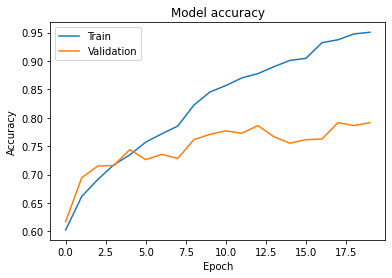

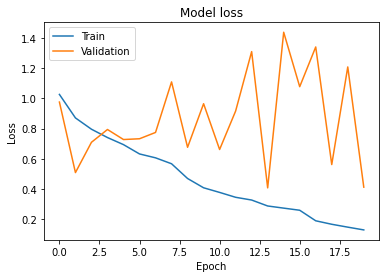

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
loss_val, acc_val = model.evaluate(valid_X, valid_y, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

1000/1000 [==============================] - 3s 3ms/step
Validation: accuracy = 0.787000  ;  loss_v = 0.944429


In [0]:
# test_y2 = to_categorical(test_y,5)

In [0]:
# loss_test, acc_test = model.evaluate(test_X, test_y2, verbose=1)
# print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

In [0]:
# test_pred = np.argmax(model.predict(test_X),-1)
# acc = accuracy_score(test_y,test_pred)

# print(acc)

0.742


In [0]:
# path = "/content/drive/My Drive/CS412 PROJECT/Saved Models"
# model.save(path+"/128_DenseNet.h5")
# model.save_weights(path+"/128_DenseNet_weights.h5")

In [0]:
model.save("/content/drive/My Drive/CS412 PROJECT/Final Notebooks/models/DenseNet_model.h5")
model.save_weights("/content/drive/My Drive/CS412 PROJECT/Final Notebooks/weights/DenseNet_model_weights.h5")

# Real Test

In [0]:
# testing_data = []

In [0]:
# testing_data = pickle.load(open("/content/drive/My Drive/CS412 PROJECT/Pickle Database/Testing_data_trimmed_no_crop.pickle", "rb"))

In [0]:
# print(len(testing_data))

5000


In [0]:
# for i in range(len(testing_data)):
#     testing_data[i] = cv2.resize(testing_data[i], (IMG_SIZE,IMG_SIZE) )

In [0]:
# print(len(testing_data))

5000


In [0]:
# testing_data = np.array(testing_data).reshape(-1,IMG_SIZE,IMG_SIZE,3)

# testing_data = testing_data / 255.0

# len(testing_data)

5000

In [0]:
# predictions = np.argmax(model.predict(testing_data),-1)

In [0]:
# results = []
# for i in range(len(predictions)):
#     results.append(predictions[i]+1)

In [0]:
# print(results)

[2, 2, 1, 5, 5, 3, 5, 2, 2, 4, 2, 1, 2, 5, 3, 1, 3, 2, 2, 1, 3, 2, 5, 1, 2, 2, 2, 4, 3, 1, 2, 2, 3, 2, 5, 1, 1, 1, 2, 2, 2, 2, 5, 2, 3, 2, 5, 2, 1, 3, 1, 5, 2, 4, 2, 1, 5, 1, 1, 2, 2, 2, 1, 4, 4, 3, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1, 2, 1, 2, 2, 3, 2, 5, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 3, 3, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 5, 2, 3, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 5, 3, 1, 2, 2, 2, 2, 5, 3, 2, 3, 2, 2, 2, 5, 2, 3, 2, 1, 3, 1, 3, 1, 5, 1, 2, 2, 3, 2, 5, 2, 2, 2, 2, 2, 2, 1, 5, 3, 2, 2, 5, 2, 2, 3, 3, 4, 1, 2, 1, 5, 3, 3, 5, 1, 2, 2, 2, 5, 5, 2, 5, 2, 3, 2, 2, 2, 1, 2, 2, 1, 5, 2, 1, 1, 2, 5, 2, 2, 5, 2, 2, 3, 2, 1, 1, 3, 1, 1, 3, 3, 5, 1, 2, 1, 2, 5, 2, 3, 1, 5, 2, 2, 2, 5, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 3, 2, 5, 2, 1, 2, 1, 5, 4, 2, 1, 2, 3, 2, 3, 2, 5, 2, 5, 2, 2, 2, 1, 3, 5, 2, 3, 3, 3, 1, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 2, 1, 2, 5, 5, 2, 2, 2, 1, 1, 2, 5, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 1, 2, 2, 3, 2, 

# Printing Data to CSV

In [0]:
# from google.colab import files

# fileName = "8k_50x50_2x2_64-128_128-256.csv"

# def printResult(images,labels): 
#     file = open(fileName,"w")

#     if(len(images) != len(labels)):
#         print("Error with the dimensions.")
#         return False
#     else:
#         file.write("Id,Category\n")
#         for i in range(len(images)):
#             file.write( str(images[i]) + "," + str(labels[i]) + "\n")
#         return True

# csv_images = []
# for i in range(10001,15001):
# 	csv_images.append("Image_" + str(i))

# if( printResult(csv_images,results) ):
#     files.download(filename= fileName)
# else:
#     print("Cannot download...")